In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
X_train = np.linspace(-1,1,20)

In [4]:
y_train = np.array([-0.6561,-0.3099,-0.59035,-0.50855,-0.285,
                    -0.2443,-0.02445,0.00135,-0.2006,0.07475,
                    -0.1422,0.06515,0.15265,0.3521,0.28415,
                    0.5524,0.23115,0.20835,0.4211,0.60485])

In [5]:
X_test = np.linspace(-1,1,20)

In [9]:
y_test = np.array([-0.69415,-0.451,-0.43005,-0.4484,-0.1475,
                  -0.5019,-0.28055,0.24595,-0.21425,-0.0286,
                  0.23415,0.46575,0.07955,0.1973,0.0719,
                  0.3639,0.5536,0.3365,0.50705,0.33435])

[]

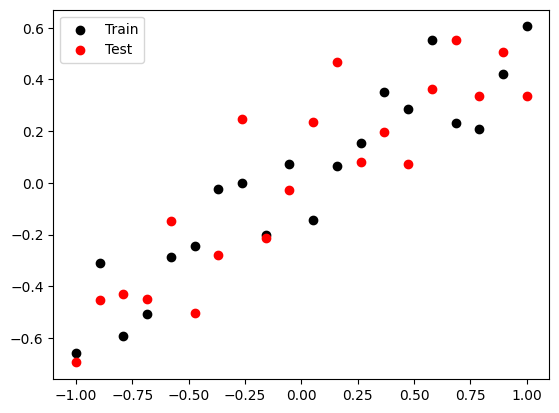

In [10]:
plt.scatter(x=X_train,y=y_train,c='black',label='Train')
plt.scatter(x=X_test,y=y_test,c='red',label='Test')
plt.legend()
plt.plot()

**Regression Model**

In [12]:
model = Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

adam = Adam(learning_rate = 0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history = model.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=500,verbose=False)

In [13]:
train_mse = model.evaluate(X_train,y_train,verbose=0)
test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Train: {}, Test: {}'.format(train_mse,test_mse))

Train: [0.004080314189195633, 0.004080314189195633], Test: [0.04511599615216255, 0.04511599615216255]


In [14]:
 y_pred = model.predict(X_test)

1/1 [==============================] - 0s 374ms/step


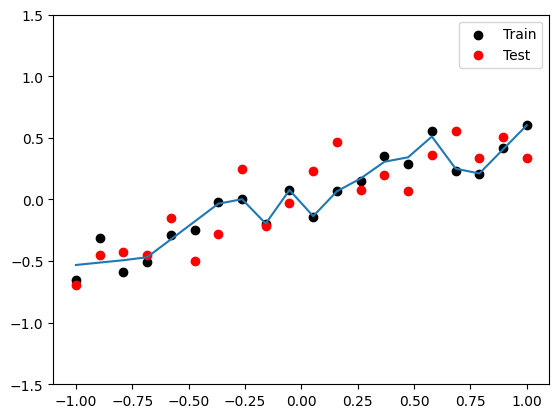

In [17]:
plt.figure()
plt.scatter(x=X_train,y=y_train,c='black',label='Train')
plt.scatter(x=X_test,y=y_test,c='red',label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

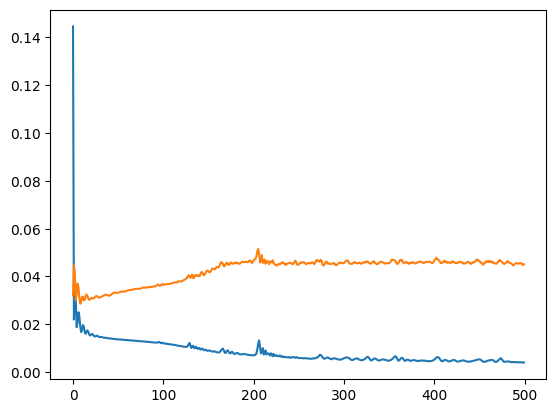

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Dropout Model**

In [24]:
model = Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='linear'))

adam = Adam(learning_rate = 0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])

history = model.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=500,verbose=False)

In [25]:
train_mse = model.evaluate(X_train,y_train,verbose=0)
test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Train: {}, Test: {}'.format(train_mse,test_mse))

Train: [0.013854986056685448, 0.013854986056685448], Test: [0.03536425903439522, 0.03536425903439522]


In [26]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 67ms/step


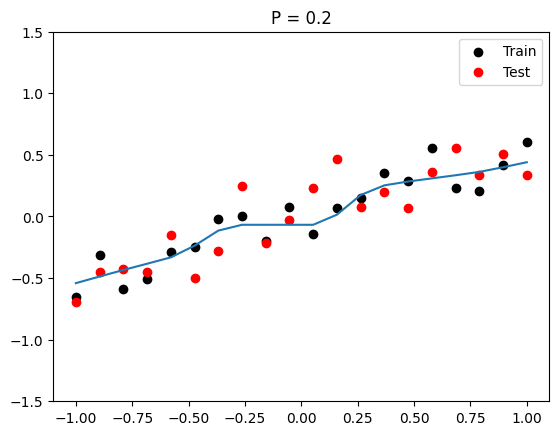

In [27]:
plt.figure()
plt.title("P = 0.2")
plt.scatter(x=X_train,y=y_train,c='black',label='Train')
plt.scatter(x=X_test,y=y_test,c='red',label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

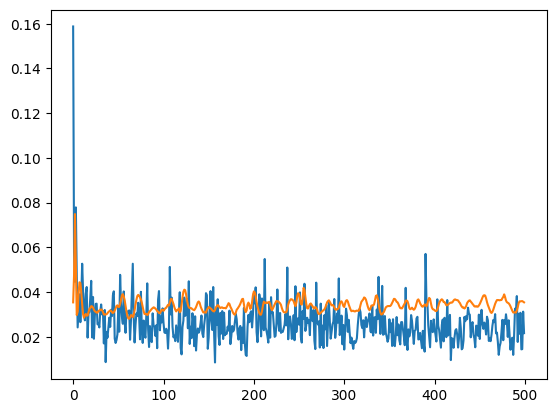

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])